In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_excel('Boston.xlsx')

In [3]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df.shape

(506, 13)

In [5]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
lstat      float64
medv       float64
dtype: object

## Initial data manipulation and exploration

array([[<Axes: title={'center': 'crim'}>, <Axes: title={'center': 'zn'}>,
        <Axes: title={'center': 'indus'}>,
        <Axes: title={'center': 'chas'}>],
       [<Axes: title={'center': 'nox'}>, <Axes: title={'center': 'rm'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'dis'}>],
       [<Axes: title={'center': 'rad'}>, <Axes: title={'center': 'tax'}>,
        <Axes: title={'center': 'ptratio'}>,
        <Axes: title={'center': 'lstat'}>],
       [<Axes: title={'center': 'medv'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

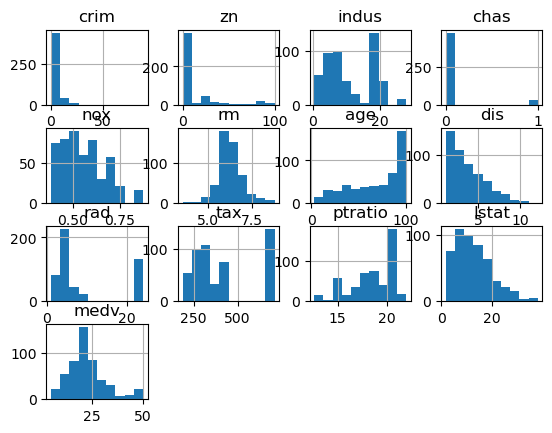

In [6]:
# Histograms.  Do they look "healthy"?  (Are the skewed in one direction?  Are they bimodal? 
# For OLS, you really want to have "Gaussian shaped" histograms, and not all features have this property here.
# At this point we just make a note of this, later you can try to improve the outcome by manipulating the
# features. 
df.hist()

In [7]:
# Are there missing values?  Look at the "Count" row to see how many entries are available for each column.
# Verify that there are no missing values.
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
num_missing1 = df.isna().sum() # Verifying there are no missing values
num_missing1

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

##  We are ready to try our first go at OLS.  In the next code cell, you will learn how to use sklearn's OLS by a toy example.  Please carefully inspect this toy example, and make sure you understand what is going on, especially the process of "fitting" (on the training data) and "predicting" (on both training and validation).  Repeat the same process below on the Boston data, using medv as the target.

In [9]:
### Toy Example (synthetic) ordinary linear regression (OLS)
import numpy as np
from sklearn.linear_model import LinearRegression
x1 = np.random.rand(100)
x2 = np.random.rand(100)
data_train = pd.DataFrame({
    'x1' : np.random.rand(100)*10,
    'x2' : np.random.rand(100)*10,
})
data_test = pd.DataFrame({
    'x1' : np.random.rand(100)*10,
    'x2' : np.random.rand(100)*10,
})

# Synthetically create a label that is a close to being a linear combination of the two features, plus some "noise".
y_train = data_train['x1'] + 2 * data_train['x2'] + np.random.rand(100)*10
y_test = data_test['x1'] + 2 * data_test['x2'] + np.random.rand(100)*10

lr = LinearRegression()
lr.fit(data_train, y_train)
print (f"Train R^2 score: {lr.score(data_train, y_train)}")
print (f"Test R^2 score: {lr.score(data_test, y_test)}")

# Get predictions
data_train['y_predicted'] = lr.predict(data_train)
data_test['y_predicted'] = lr.predict(data_test)


## In order to do "Ridge regression" (L2 regularization)
# from sklearn.linear_model import Ridge
# ridge_lr = Ridge(alpha=....)
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
## Lasso (L1 regularization)
# from sklearn.linear_model import Lasso
# lasso_lr = Lasso(alpha=....)
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html


Train R^2 score: 0.8488310834017656
Test R^2 score: 0.8440645075492789


## After making sure you understand the example, go ahead and run OLS on the Boston data, with medv as the target. First you will need to split the data to train (in this case, 80%) and test (the remaining 20%). Output the R-squared score of the model on both the training and on the test set, as well as the MSE on both.  You can use sklearn.metrics.r2_score for getting the R2 score, or do it as above using the trained LinearRegression object. You can use sklearn.metrics.mean_squared_error for the MSE.  Refer to the documentation of sklearn for usage of both.


In [10]:
# No missing values, all features numerical, let's try OLS.  
# First, let's do standars scaling of the variables.
# you code here...

# Scale the data using StandardScaler.

scaler = StandardScaler()

scaler.fit(df)

scaled_data = scaler.transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,7.898820e-17,2.106352e-16,-3.510587e-17,-1.965929e-16,-1.088282e-16,-1.474446e-16,-8.425408e-17,-1.123388e-16,0.000000,-4.212704e-16,-3.089316e-16,-5.195668e-16
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990,1.000990e+00,1.000990e+00,1.000990e+00
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990,-2.707379e+00,-1.531127e+00,-1.908226e+00
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-0.767576,-4.880391e-01,-7.994200e-01,-5.994557e-01
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-0.464673,2.748590e-01,-1.812536e-01,-1.450593e-01
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926,8.065758e-01,6.030188e-01,2.685231e-01
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194,1.638828e+00,3.548771e+00,2.989460e+00


In [11]:
# Split the data into train and test
# your code here...

y = df['medv']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [12]:
X = df.drop('medv', axis = 1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=222)

In [14]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,14.65
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,6.27
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,7.34
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,4.54
...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337,16.1,10.24
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8,15.76
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21


In [15]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
216,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,13.51
238,0.08244,30.0,4.93,0,0.4280,6.481,18.5,6.1899,6,300,16.6,6.36
281,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216,14.9,4.59
462,6.65492,0.0,18.10,0,0.7130,6.317,83.0,2.7344,24,666,20.2,13.99
288,0.04590,52.5,5.32,0,0.4050,6.315,45.6,7.3172,6,293,16.6,7.60
...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.13554,12.5,6.07,0,0.4090,5.594,36.8,6.4980,4,345,18.9,13.09
421,7.02259,0.0,18.10,0,0.7180,6.006,95.3,1.8746,24,666,20.2,15.70
402,9.59571,0.0,18.10,0,0.6930,6.404,100.0,1.6390,24,666,20.2,20.31
396,5.87205,0.0,18.10,0,0.6930,6.405,96.0,1.6768,24,666,20.2,19.37


In [16]:
# Train the linear regression algorithm on the training set, compute MSE and R2 on both training and test
# Your code here...

lr = LinearRegression()
lr.fit(X_train, y_train)
print (f"Train R^2 score: {lr.score(X_train, y_train)}")
print (f"Test R^2 score: {lr.score(X_test, y_test)}")

# Get predictions
X_train['y_predicted'] = lr.predict(X_train)
X_test['y_predicted'] = lr.predict(X_test)

y_train_pred=X_train['y_predicted']
y_test_pred=X_test['y_predicted']


# Mean squared error (MSE) on training data
mse_train = mean_squared_error(y_train, y_train_pred )
print("Mean squared error (MSE) on training data:", mse_train)

# Mean squared error (MSE) on testing data
mse_test = mean_squared_error(y_test, y_test_pred)
print("Mean squared error (MSE) on testing data:", mse_test)

Train R^2 score: 0.7481346818059464
Test R^2 score: 0.6788280906343231
Mean squared error (MSE) on training data: 20.89916808181442
Mean squared error (MSE) on testing data: 28.717439951936374


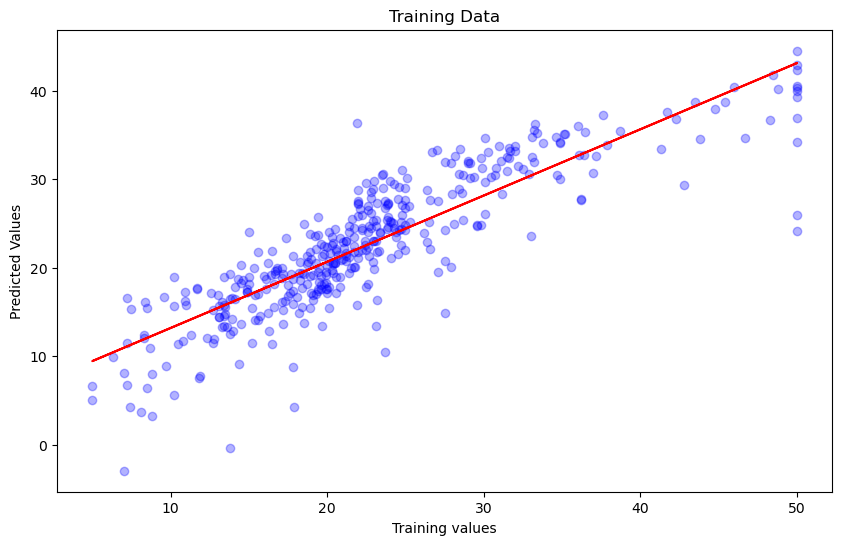

In [17]:
# A good way to visualize the error structure is to plot the label y against the predicted (y-hat) in the same plot.
# Do this for both train and test and inspect the result.  Do the residuals seem to be evenly distributed across
# the range of y values, or are they higher when y is high?  Perhaps they are  higher when y is low?

# Plot the training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.3)

z= np.polyfit(y_train, y_train_pred,1)
p=np.poly1d(z)

plt.plot(y_train, p(y_train), color='red')
plt.xlabel('Training values')
plt.ylabel('Predicted Values')
plt.title('Training Data')
plt.show()

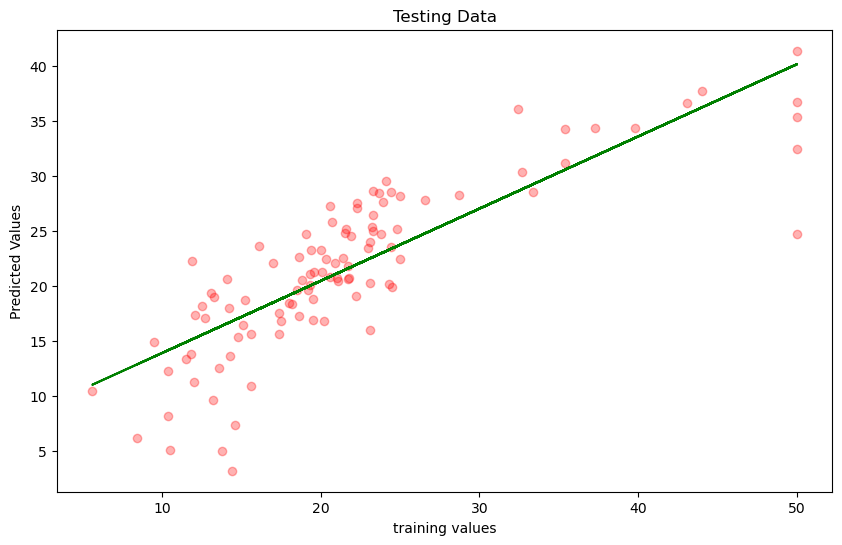

In [18]:
# Plot the testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='red', alpha =0.3)

z= np.polyfit(y_test, y_test_pred,1)
p=np.poly1d(z)

plt.plot(y_test, p(y_test), color='green')
plt.xlabel('training values')
plt.ylabel('Predicted Values')
plt.title('Testing Data')
plt.show()

## The goal of the next part is to try to create a "sweet spot" plot with ridge regression, using the alpha parameter as a model complexity knob.  To make the plot clearer, first chop off everything but the first 50 rows of X_train and y_train (this is not something you want to do in general, it is just to get the plot), but store the chopped version in a different variable, because you will need the full X_train and y_train later.  In a loop with alpha in 0,1,2,3,...,49 train a linear Ridge regression (see comments in the toy example above for instructions), and store both the training R2 metric (or MSE) and the test R2 metric (or MSE) in arrays.  There should be a total of 50 evaluation metrics for both training and testing.  Now plot the evaluation metric for the training data, against the alpha parameter (in blue), and the same for the testing data (in red).  Does the sweet-splot pattern emerge?

In [19]:
from sklearn.linear_model import Ridge
# Your code here...
X1 = df.drop('medv', axis = 1)[:50]
X1

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,17.10


In [20]:
y1 = df['medv'][:50]
y1

0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
5     28.7
6     22.9
7     27.1
8     16.5
9     18.9
10    15.0
11    18.9
12    21.7
13    20.4
14    18.2
15    19.9
16    23.1
17    17.5
18    20.2
19    18.2
20    13.6
21    19.6
22    15.2
23    14.5
24    15.6
25    13.9
26    16.6
27    14.8
28    18.4
29    21.0
30    12.7
31    14.5
32    13.2
33    13.1
34    13.5
35    18.9
36    20.0
37    21.0
38    24.7
39    30.8
40    34.9
41    26.6
42    25.3
43    24.7
44    21.2
45    19.3
46    20.0
47    16.6
48    14.4
49    19.4
Name: medv, dtype: float64

In [21]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [32]:
# Create a Ridge object
ridge = Ridge()

# Create arrays to store the evaluation metrics
train_r2_scores = []
test_r2_scores = []
alphas = range(50)

for alpha in alphas:
    # Train the model on the training data
    ridge.set_params(alpha=alpha)
    ridge.fit(X1_train, y1_train)

    # Make predictions on the training and testing data
    train1_pred = ridge.predict(X1_train)
    test1_pred = ridge.predict(X1_test)

    # Calculate the R-squared score for both training and testing data
    train1_r2 = r2_score(y1_train, train1_pred)
    test1_r2 = r2_score(y1_test, test1_pred)

    # Store the evaluation metrics in the arrays
    train_r2_scores.append(train1_r2)
    test_r2_scores.append(test1_r2)


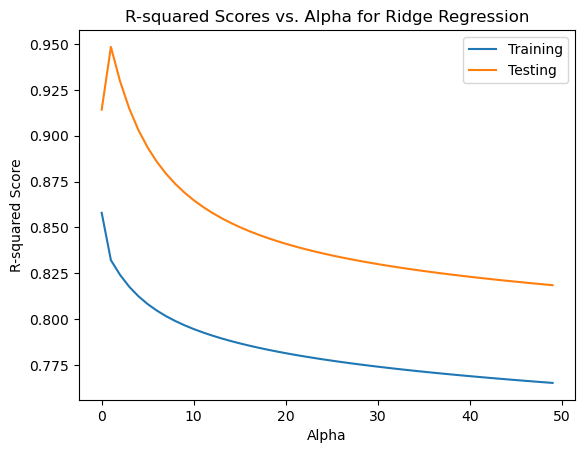

In [33]:
# Plot the training R2 scores against the alpha parameter
plt.plot(alphas, train_r2_scores, label='Training')
plt.plot(alphas, test_r2_scores, label='Testing')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores vs. Alpha for Ridge Regression')
plt.legend()
plt.show()

## Finally in the code cells before, try to get a better result (than the OLS experiment) by possibly manipulating features, using Ridge/Lasso with various parameters etc. You are free to try everything you have learned so far.  Do not use the chopped training data from the last step - use the enire

In [24]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [25]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48


In [26]:
X_train

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,y_predicted
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,21.14,13.473968
461,3.69311,0.0,18.10,0,0.713,6.376,88.4,2.5671,24,666,20.2,14.65,19.265339
295,0.12932,0.0,13.92,0,0.437,6.678,31.1,5.9604,4,289,16.0,6.27,28.426435
329,0.06724,0.0,3.24,0,0.460,6.333,17.2,5.2146,4,430,16.9,7.34,24.029123
308,0.49298,0.0,9.90,0,0.544,6.635,82.5,3.3175,4,304,18.4,4.54,28.601801
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.04379,80.0,3.37,0,0.398,5.787,31.1,6.6115,4,337,16.1,10.24,25.797276
14,0.63796,0.0,8.14,0,0.538,6.096,84.5,4.4619,4,307,21.0,10.26,19.416497
115,0.17134,0.0,10.01,0,0.547,5.928,88.2,2.4631,6,432,17.8,15.76,20.629912
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21,22.116382


In [27]:
X_test

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,y_predicted
216,0.04560,0.0,13.89,1,0.5500,5.888,56.0,3.1121,5,276,16.4,13.51,26.404542
238,0.08244,30.0,4.93,0,0.4280,6.481,18.5,6.1899,6,300,16.6,6.36,28.475197
281,0.03705,20.0,3.33,0,0.4429,6.968,37.2,5.2447,5,216,14.9,4.59,34.272547
462,6.65492,0.0,18.10,0,0.7130,6.317,83.0,2.7344,24,666,20.2,13.99,18.788069
288,0.04590,52.5,5.32,0,0.4050,6.315,45.6,7.3172,6,293,16.6,7.60,27.559992
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,0.13554,12.5,6.07,0,0.4090,5.594,36.8,6.4980,4,345,18.9,13.09,17.528128
421,7.02259,0.0,18.10,0,0.7180,6.006,95.3,1.8746,24,666,20.2,15.70,17.941340
402,9.59571,0.0,18.10,0,0.6930,6.404,100.0,1.6390,24,666,20.2,20.31,17.315896
396,5.87205,0.0,18.10,0,0.6930,6.405,96.0,1.6768,24,666,20.2,19.37,18.196981


In [34]:
# Create a Lasso object
lasso = Lasso()

# Create arrays to store the evaluation metrics
train1_r2_scores = []
test1_r2_scores = []
alphas = [0.001, 0.01, 0.1, 1, 10, 50]

In [35]:
# Loop over alpha values
for alpha in alphas:
    # Train the model on the training data
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train, y_train)

    # Make predictions on the training and testing data
    train_pred = lasso.predict(X_train)
    test_pred = lasso.predict(X_test)

    # Calculate the R-squared score for both training and testing data
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    # Store the evaluation metrics in the arrays
    train1_r2_scores.append(train_r2)
    test1_r2_scores.append(test_r2)

C:\Users\STRON\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.147e+03, tolerance: 3.352e+00
  model = cd_fast.enet_coordinate_descent(


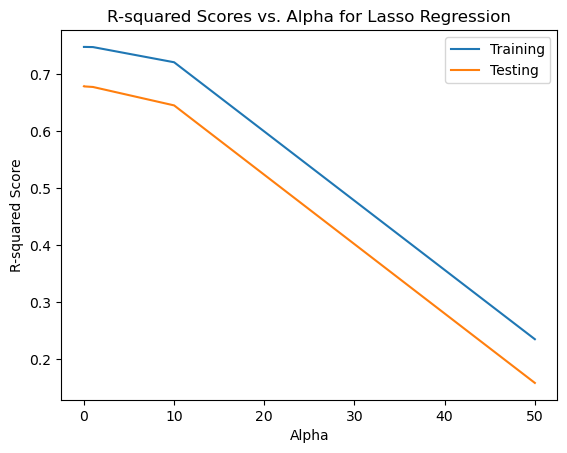

In [36]:
# Plot the training R2 scores against the alpha parameter
plt.plot(alphas, train1_r2_scores, label='Training')
plt.plot(alphas, test1_r2_scores, label='Testing')
plt.xlabel('Alpha')
plt.ylabel('R-squared Score')
plt.title('R-squared Scores vs. Alpha for Lasso Regression')
plt.legend()
plt.show()